<a href="https://colab.research.google.com/github/branndonm1/IBJJF_Srape_And_Analysis/blob/main/IBJJF_Srape_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to scrape the ibjjf website to create a csv file with data in the following format
competition_name|year|academy|number of top 3 placers

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


In [ ]:
results_page = requests.get('https://ibjjf.com/events/results').text
results_html = BeautifulSoup(results_page, 'lxml')
results_sections = results_html.find_all('div', class_='year mr-2')


In [ ]:
#give link to page, returns dictionary with academies and number of times they places (in top 3) that year
def comp_result_counter(link):
  comp_result_page = requests.get(link).text
  comp_result_page_html = BeautifulSoup(comp_result_page, 'lxml')
  placed_academies_html=comp_result_page_html.find_all('div', class_='academy-name')

  placed_academies = [a.text for a in placed_academies_html]
  while "" in placed_academies:
    placed_academies.remove("")
  placed_academies_w_count = {x:placed_academies.count(x) for x in placed_academies}

  return placed_academies_w_count



In [ ]:
data=[]

for s in results_sections:
  count_dict = comp_result_counter(s.a['href'])
  temp_data = [[s.a['data-n'], s.a['data-y'], x, count_dict[x]] for x in count_dict]
  data.extend(temp_data)


In [ ]:
for x in data:
  t1=int(x[1])
  t2=int(x[3])
  x[1] = t1
  x[3] = t2

In [ ]:
df = pd.DataFrame(data, columns = ['Competition_Name', 'Year', 'Academy', 'Top_Three_Places'])

In [ ]:
df.head()

,Competition_Name,Year,Academy,Top_Three_Places
0,World Jiu-Jitsu IBJJF Championship,1996,Monteiro,1
1,World Jiu-Jitsu IBJJF Championship,1996,Nova Uniao,8
2,World Jiu-Jitsu IBJJF Championship,1996,Fabricio e Luiz Paulo,1
3,World Jiu-Jitsu IBJJF Championship,1996,Gracie Barra,16
4,World Jiu-Jitsu IBJJF Championship,1996,Alliance,9


In [ ]:
df.tail()

,Competition_Name,Year,Academy,Top_Three_Places
12743,Honolulu International Open IBJJF Jiu-Jitsu Ch...,2010,GF Team,2
12744,Honolulu International Open IBJJF Jiu-Jitsu Ch...,2010,Yamasaki Academy,1
12745,Honolulu International Open IBJJF Jiu-Jitsu Ch...,2010,Drysdale JJ,2
12746,Honolulu International Open IBJJF Jiu-Jitsu Ch...,2010,Check Mat Bjj,2
12747,Honolulu International Open IBJJF Jiu-Jitsu Ch...,2010,Fight Sport,2


In [ ]:
df.to_csv('bjjstats.csv', sep=',', encoding='utf-8', index=False)

# Data Analysis

In [ ]:
ninetysix_df = df.loc[df['Year'] == 1996]

In [ ]:
ninetysix_df

,Competition_Name,Year,Academy,Top_Three_Places
0,World Jiu-Jitsu IBJJF Championship,1996,Monteiro,1
1,World Jiu-Jitsu IBJJF Championship,1996,Nova Uniao,8
2,World Jiu-Jitsu IBJJF Championship,1996,Fabricio e Luiz Paulo,1
3,World Jiu-Jitsu IBJJF Championship,1996,Gracie Barra,16
4,World Jiu-Jitsu IBJJF Championship,1996,Alliance,9
...,...,...,...,...
4550,Campeonato Brasileiro de Jiu-Jitsu,1996,Pagels,2
4551,Campeonato Brasileiro de Jiu-Jitsu,1996,Jose Carlos,1
4552,Campeonato Brasileiro de Jiu-Jitsu,1996,Evaristo,1
4553,Campeonato Brasileiro de Jiu-Jitsu,1996,Estrela do Oriente,1


In [ ]:
ninetysix_df.describe()

,Year,Top_Three_Places
count,157.0,157.000000
mean,1996.0,4.210191
std,0.0,6.547687
min,1996.0,1.000000
25%,1996.0,1.000000
50%,1996.0,2.000000
75%,1996.0,4.000000
max,1996.0,39.000000


In [ ]:
ninetysix_df.loc[ninetysix_df["Top_Three_Places"] >= 33]

,Competition_Name,Year,Academy,Top_Three_Places
4457,Campeonato Brasileiro de Jiu-Jitsu,1996,Gracie Barra,33
4479,Campeonato Brasileiro de Jiu-Jitsu,1996,Alliance,39


In [ ]:
unique_academies_ninetysix = list(ninetysix_df.Academy.unique())

In [ ]:
count = []
for x in unique_academies_ninetysix:
  count.append(sum(ninetysix_df.loc[ninetysix_df["Academy"] == x].Top_Three_Places))

In [ ]:
data1 = [[unique_academies_ninetysix[i],count[i]] for i in range(len(count))]

In [ ]:
ninetysix_academies_df = pd.DataFrame(data1, columns=['Academy', 'Top_Three_Placers'])

In [ ]:
ninetysix_academies_df

,Academy,Top_Three_Placers
0,Monteiro,7
1,Nova Uniao,38
2,Fabricio e Luiz Paulo,1
3,Gracie Barra,51
4,Alliance,55
...,...,...
137,Leão Dourado,2
138,Jose Carlos,1
139,Evaristo,1
140,Estrela do Oriente,1


In [ ]:
ninetysix_academies_df.describe()

,Top_Three_Placers
count,142.000000
mean,4.654930
std,8.595765
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,55.000000


In [ ]:
ninetysix_academies_df.loc[ninetysix_academies_df["Top_Three_Placers"] >= 46]

,Academy,Top_Three_Placers
3,Gracie Barra,51
4,Alliance,55


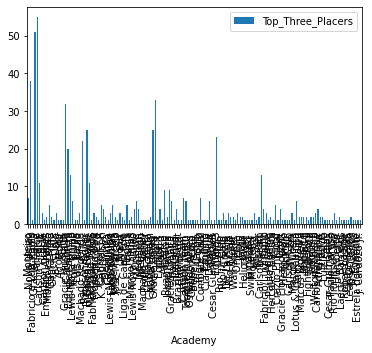

In [ ]:
ninetysix_academies_df.plot.bar(x='Academy', y="Top_Three_Placers")